In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# change directory to excel file and read excel file
os.chdir('C:/Anaconda3/projects/oled')
df = pd.read_excel('oled.xlsx', sheetname='extend_side')
print(df.shape)
df.head()

(185, 22)


,no,homo_1,homo_2,homo_3,lumo4,homo4,total_htl,triplet1,LUMO,HOMO,...,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf_1,cd/A,label
0,1,5.2,5.8,5.9,2.4,5.9,30,3.00,1.09,5.34,...,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,2,9.5,5.8,5.8,2.0,5.8,40,2.87,2.02,5.56,...,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,3,5.3,5.6,5.6,2.0,5.6,70,2.87,2.40,5.90,...,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
3,4,5.2,5.2,5.2,3.3,5.2,0,0.00,2.70,5.71,...,2.60,6.20,NaN,0.00,0,4.20,4.20,4.2,3.38,c
4,5,5.2,5.8,5.8,2.7,5.8,5,2.60,2.02,5.35,...,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c


In [3]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
# NAs[NAs.sum(axis=1) > 0]

tripletdopant    27
triplet2         18
triplet3          1
HOMO              0
homo_1            0
homo_2            0
homo_3            0
lumo4             0
homo4             0
total_htl         0
triplet1          0
LUMO              0
label             0
cd/A              0
thick             0
lumo_d1           0
homo_d1           0
thick_etl         0
lumo5             0
lumo6             0
wf_1              0
no                0
dtype: int64

In [4]:
#fill the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(143, 22)


In [5]:
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(143, 21)


,homo_1,homo_2,homo_3,lumo4,homo4,total_htl,triplet1,LUMO,HOMO,triplet2,...,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf_1,cd/A,label
0,5.2,5.8,5.9,2.4,5.9,30,3.00,1.09,5.34,2.91,...,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,9.5,5.8,5.8,2.0,5.8,40,2.87,2.02,5.56,2.84,...,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,5.3,5.6,5.6,2.0,5.6,70,2.87,2.40,5.90,3.00,...,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
4,5.2,5.8,5.8,2.7,5.8,5,2.60,2.02,5.35,2.60,...,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c
9,9.5,5.5,5.5,2.0,5.5,45,2.87,2.55,5.90,2.80,...,2.20,4.80,2.59,2.75,45,2.73,2.73,4.3,60.30,a


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241188CE8D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000241190A14E0>]], dtype=object)

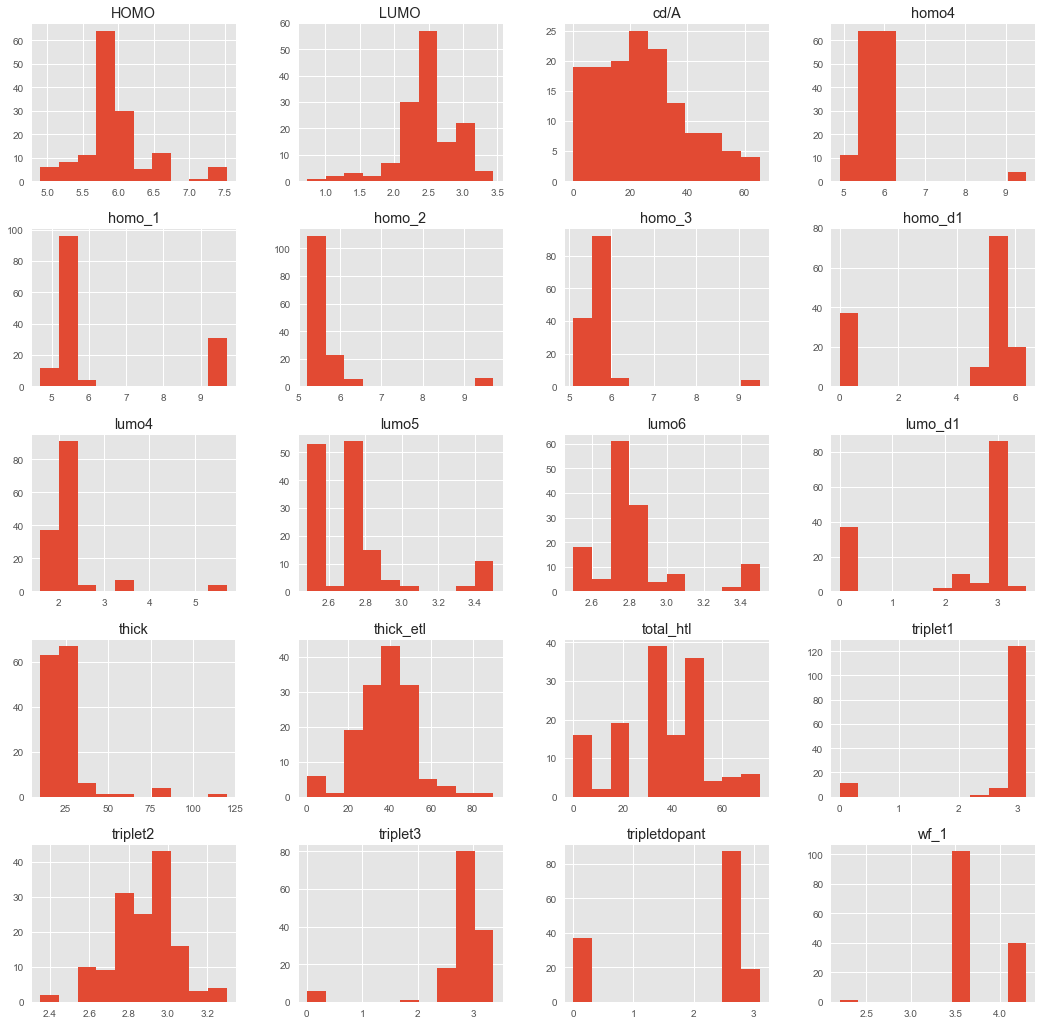

In [6]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
graph = df[list(df.columns)[:-1]]
graph.hist()

In [7]:
df.dtypes

homo_1           float64
homo_2           float64
homo_3           float64
lumo4            float64
homo4            float64
total_htl          int64
triplet1         float64
LUMO             float64
HOMO             float64
triplet2         float64
thick              int64
lumo_d1          float64
homo_d1          float64
tripletdopant    float64
triplet3         float64
thick_etl          int64
lumo5            float64
lumo6            float64
wf_1             float64
cd/A             float64
label             object
dtype: object

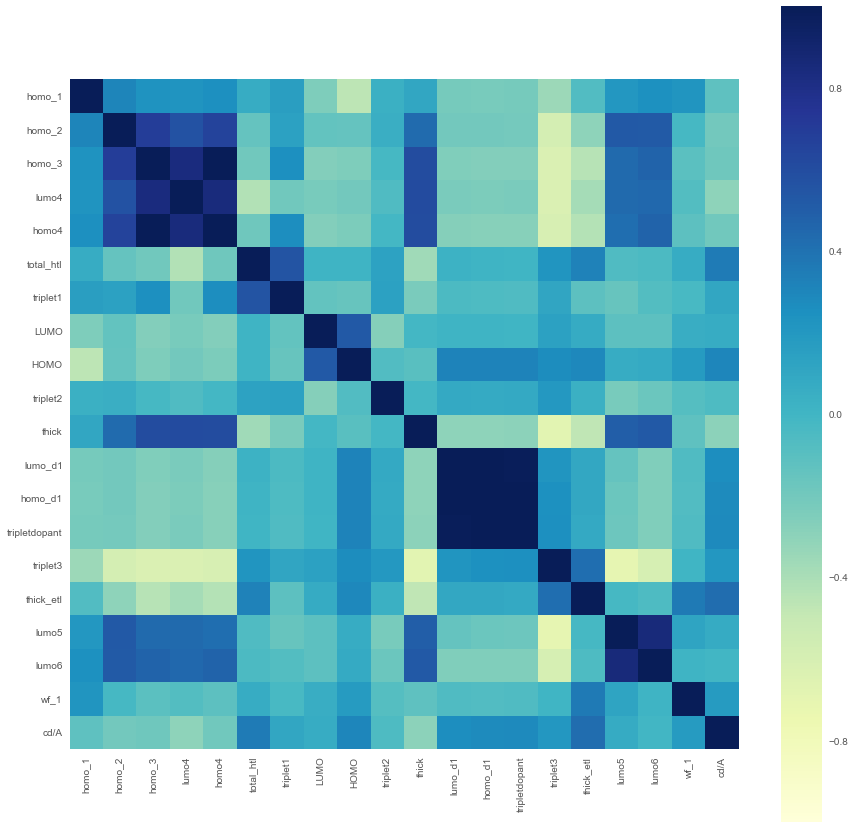

List the features in descending order of their correlation with cd/A:

thick_etl:   0.42916422450997804
total_htl:   0.35848229004752324
lumo4:   -0.2990296137544982
HOMO:   0.29888023867170654
thick:   -0.29653912713772224
tripletdopant:   0.28572053749306003
homo_d1:   0.27680597128624346
lumo_d1:   0.26309075008092886
triplet3:   0.20800823865172507
homo_2:   -0.19836363625678663
homo4:   -0.18977893435713913
wf_1:   0.18742628168707037
homo_3:   -0.18209197934200028
homo_1:   -0.12054922192064421
triplet1:   0.10598588701673271
lumo5:   0.07774539128649743
LUMO:   0.06693713825879542
triplet2:   -0.049945247837649406
lumo6:   -0.0026420883589290804


In [8]:
X = df[list(df.columns)[:-1]]
corr = X.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu",linecolor='black', annot=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

cor_dict = corr['cd/A'].to_dict()
del cor_dict['cd/A']
print("List the features in descending order of their correlation with cd/A:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}:   {1}".format(*ele))

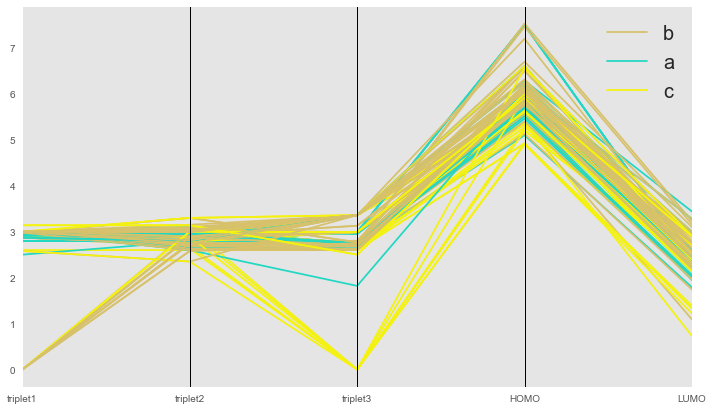

In [9]:
# parallel coordinate
X = df[ ['triplet1']+ ['triplet2']+ ['triplet3'] + ['HOMO'] + ['LUMO'] + ['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20, 'legend.loc':'best'}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()

In [ ]:
# parallel coordinate
X = df[['thick_etl'] + ['thick']+ ['total_htl'] + ['cd/A'] +['label']]

plt.rcParams['figure.figsize'] = (12,7) 
params = {'legend.fontsize': 20}
plt.rcParams.update(params)
parallel_coordinates(X, 'label')
plt.show()